# **Import kaggle Files**

In [1]:


# Upload kaggle.json
from google.colab import files
files.upload()

# Move kaggle.json to ~/.kaggle and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


# **Download the data set**

## **Download and Unzip the data Set**

In [ ]:
# Download LUFlow dataset
!kaggle datasets download -d mryanm/luflow-network-intrusion-detection-data-set

# Unzip the downloaded file
!unzip luflow-network-intrusion-detection-data-set.zip


Dataset URL: https://www.kaggle.com/datasets/mryanm/luflow-network-intrusion-detection-data-set
License(s): CC-BY-SA-4.0
100% 4.59G/4.59G [01:25<00:00, 70.1MB/s]
100% 4.59G/4.59G [01:25<00:00, 57.4MB/s]
Archive:  luflow-network-intrusion-detection-data-set.zip
  inflating: 2020/06/2020.06.19/2020.06.19.csv  
  inflating: 2020/06/2020.06.20/2020.06.20.csv  
  inflating: 2020/06/2020.06.21/2020.06.21.csv  
  inflating: 2020/06/2020.06.22/2020.06.22.csv  
  inflating: 2020/06/2020.06.23/2020.06.23.csv  
  inflating: 2020/06/2020.06.24/2020.06.24.csv  
  inflating: 2020/06/2020.06.25/2020.06.25.csv  
  inflating: 2020/06/2020.06.26/2020.06.26.csv  
  inflating: 2020/06/2020.06.27/2020.06.27.csv  
  inflating: 2020/06/2020.06.28/2020.06.28.csv  
  inflating: 2020/06/2020.06.29/2020.06.29.csv  
  inflating: 2020/06/2020.06.30/2020.06.30.csv  
  inflating: 2020/07/2020.07.01/2020.07.01.csv  
  inflating: 2020/07/2020.07.02/2020.07.02.csv  
  inflating: 2020/07/2020.07.03/2020.07.03.csv  
  in

## **Read the 2020**


---
Read the 2020 data set and Store in one CSV file


In [ ]:
import os
import pandas as pd

# Define the base directory for the dataset
base_dir = '/content/2020'

# Initialize an empty list to store processed chunks
data_frames = []

# Traverse each month and read all CSV files in chunks
for year in os.listdir(base_dir):
    year_path = os.path.join(base_dir, year)
    if os.path.isdir(year_path):
        for month in os.listdir(year_path):
            month_path = os.path.join(year_path, month)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(month_path, file)

                        # Read the file in chunks
                        for chunk in pd.read_csv(file_path, chunksize=10000):  # Adjust chunksize as needed
                            # Process chunk if necessary (e.g., filter or select columns)
                            data_frames.append(chunk)
                            # Clear data in RAM periodically
                            if len(data_frames) >= 10:  # Adjust this to control memory usage
                                luflow_data = pd.concat(data_frames, ignore_index=True)
                                data_frames = []  # Clear list to free up memory

# Concatenate any remaining data frames
if data_frames:
    luflow_data = pd.concat(data_frames, ignore_index=True)




## **Have a look**

In [ ]:
luflow_data

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.000000,0,13032,786,9200.0,2.060537,9,0,6,786,47622.0,1603651788894452,1603651788894359,26852.914000,benign,0.000093
1,0.000000,0,1448,786,9200.0,4.937801,1,0,6,786,47604.0,1603651788894516,1603651788894516,7149.935500,benign,0.000000
2,0.000000,0,11584,786,9200.0,2.241657,8,1,6,786,47604.0,1603651788894935,1603651788894545,25967.352000,benign,0.000390
3,0.000000,0,0,786,47622.0,0.000000,1,0,6,786,9200.0,1603651788894853,1603651788894853,0.000000,benign,0.000000
4,0.000000,0,0,786,47622.0,0.000000,1,0,6,786,9200.0,1603651788895041,1603651788895041,0.000000,benign,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73927,194.083333,1359,761,786,22.0,6.934159,12,14,6,14061,59306.0,1603670366888233,1603670364388557,14700.417000,malicious,2.499676
73928,227.083333,1359,745,786,22.0,6.938264,12,14,6,45090,45694.0,1603670369993704,1603670367049935,14598.108000,malicious,2.943769
73929,0.000000,56,56,786,NaN,1.020244,1,1,1,16509,NaN,1603670381510233,1603670381510086,114.267365,malicious,0.000147
73930,0.000000,56,56,786,NaN,1.020244,1,1,1,16509,NaN,1603670383993482,1603670383993417,114.267365,malicious,0.000065


## **Save the dataset for Later Use**

In [ ]:
luflow_data.to_csv('luflow_data.csv', index=False)

# **Read again the dataset**

In [1]:
import pandas as pd
luflow_data = pd.read_csv('luflow_data.csv')

## **Data frame Coloms**

In [22]:
luflow_data

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.000000,0,13032,786,9200.0,2.060537,9,0,2,786,47622.0,1603651788894452,1603651788894359,26852.914000,0,0.000093
1,0.000000,0,1448,786,9200.0,4.937801,1,0,2,786,47604.0,1603651788894516,1603651788894516,7149.935500,0,0.000000
2,0.000000,0,11584,786,9200.0,2.241657,8,1,2,786,47604.0,1603651788894935,1603651788894545,25967.352000,0,0.000390
3,0.000000,0,0,786,47622.0,0.000000,1,0,2,786,9200.0,1603651788894853,1603651788894853,0.000000,0,0.000000
4,0.000000,0,0,786,47622.0,0.000000,1,0,2,786,9200.0,1603651788895041,1603651788895041,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73927,194.083333,1359,761,786,22.0,6.934159,12,14,2,14061,59306.0,1603670366888233,1603670364388557,14700.417000,1,2.499676
73928,227.083333,1359,745,786,22.0,6.938264,12,14,2,45090,45694.0,1603670369993704,1603670367049935,14598.108000,1,2.943769
73929,0.000000,56,56,786,5900.0,1.020244,1,1,0,16509,47626.0,1603670381510233,1603670381510086,114.267365,1,0.000147
73930,0.000000,56,56,786,5900.0,1.020244,1,1,0,16509,47626.0,1603670383993482,1603670383993417,114.267365,1,0.000065


In [2]:
luflow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73932 entries, 0 to 73931
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_ipt        73932 non-null  float64
 1   bytes_in       73932 non-null  int64  
 2   bytes_out      73932 non-null  int64  
 3   dest_ip        73932 non-null  int64  
 4   dest_port      71221 non-null  float64
 5   entropy        73932 non-null  float64
 6   num_pkts_out   73932 non-null  int64  
 7   num_pkts_in    73932 non-null  int64  
 8   proto          73932 non-null  int64  
 9   src_ip         73932 non-null  int64  
 10  src_port       71221 non-null  float64
 11  time_end       73932 non-null  int64  
 12  time_start     73932 non-null  int64  
 13  total_entropy  73932 non-null  float64
 14  label          73932 non-null  object 
 15  duration       73932 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 9.0+ MB


In [6]:
luflow_data.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,2.029300e+04,20293.000000,20293.000000,20293.000000,20074.00000,20293.000000,20292.000000,20292.000000,20292.000000,20292.000000,20073.000000,2.029200e+04,2.029200e+04,20292.000000,20292.000000
mean,5.874749e+06,183.157296,1995.565170,5489.029764,16369.48391,3.096891,2.526168,0.828110,6.210576,22229.302385,40096.415583,1.460715e+15,1.461261e+15,7453.444202,0.064496
std,9.231489e+07,1141.056054,3589.429842,29306.898972,18782.61345,2.436525,5.857343,3.056855,1.770745,61232.937340,19349.832182,4.335705e+14,4.330154e+14,10010.017990,0.993934
min,0.000000e+00,0.000000,0.000000,786.000000,22.00000,0.000000,1.000000,0.000000,1.000000,786.000000,22.000000,1.603651e+12,1.603652e+11,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,786.000000,3389.00000,0.000000,1.000000,0.000000,6.000000,786.000000,40088.000000,1.603652e+15,1.603652e+15,0.000000,0.000000
50%,0.000000e+00,0.000000,191.000000,786.000000,9200.00000,3.781392,1.000000,0.000000,6.000000,786.000000,47626.000000,1.603652e+15,1.603652e+15,2119.869750,0.000032
75%,0.000000e+00,0.000000,2075.000000,786.000000,9200.00000,5.127602,3.000000,1.000000,6.000000,15895.000000,49292.000000,1.603652e+15,1.603652e+15,13990.964750,0.000414
max,4.294967e+09,23890.000000,63788.000000,398324.000000,65510.00000,7.850992,254.000000,120.000000,17.000000,398324.000000,65528.000000,1.603653e+15,1.603653e+15,150896.440000,30.628704


## **Cheaking the missing values**

In [7]:
# Check for missing values
print("Missing values per column:\n", luflow_data.isnull().sum())

# Drop or fill missing values if necessary
luflow_data = luflow_data.dropna()  # or use luflow_data.fillna(value)



Missing values per column:
 avg_ipt            0
bytes_in           0
bytes_out          0
dest_ip            0
dest_port        219
entropy            0
num_pkts_out       1
num_pkts_in        1
proto              1
src_ip             1
src_port         220
time_end           1
time_start         1
total_entropy      1
label              1
duration           1
dtype: int64


**Drop the outlier**

In [3]:
# Drop rows where label column contains the value 'outlier'
luflow_data = luflow_data[luflow_data['label'] != 'outlier']


# **Exploratry data Analysis**

## **Class Distribution**

In [4]:
# Check the class distribution
if 'label' in luflow_data.columns:
    print("Class distribution:\n", luflow_data['label'].value_counts())


Class distribution:
 label
malicious    43074
benign       28149
Name: count, dtype: int64


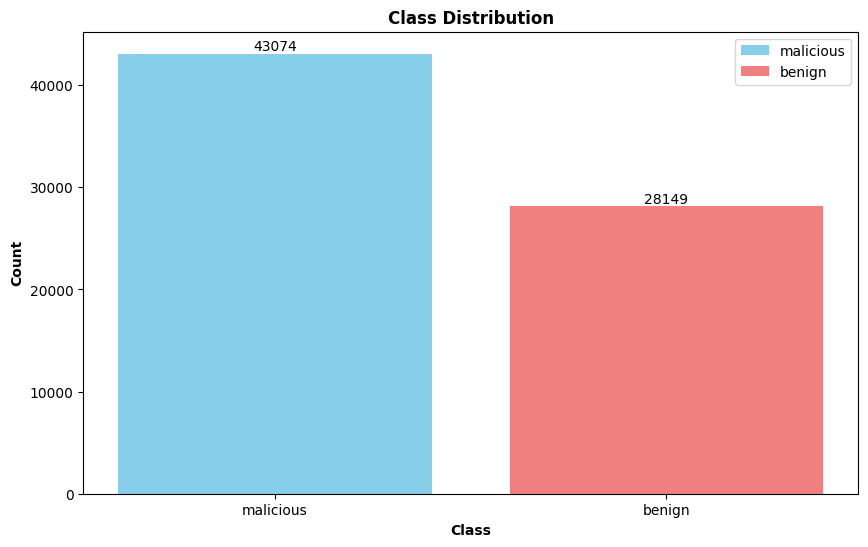

In [5]:

import matplotlib.pyplot as plt

class_distribution = luflow_data['label'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars = plt.bar(class_distribution.index, class_distribution.values, color=['skyblue', 'lightcoral'])

# Add labels and title with bold font
plt.xlabel("Class", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("Class Distribution", fontweight='bold')

# Add legend
plt.legend(bars, class_distribution.index)

# Add value labels on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# fill missing values with a median
luflow_data['dest_port'].fillna(luflow_data['dest_port'].median(), inplace=True)
luflow_data['src_port'].fillna(luflow_data['src_port'].median(), inplace=True)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output


# **Label Encoding**

## **Label Encoding the Feature Colom**

In [9]:

luflow_data['proto'] = LabelEncoder().fit_transform(luflow_data['proto'])


## **Label Encode the Label Colom**

In [10]:

luflow_data['label'] = LabelEncoder().fit_transform(luflow_data['label'])


# **Drop the unnecessary colom**

## **Select the Feature And Label Colom**

---
# Dropping IP and port columns


In [11]:

# Select features and target
X = luflow_data.drop(columns=['label', 'src_ip', 'dest_ip', 'src_port', 'dest_port'])
y = luflow_data['label']


# **Standard Scaler**

In [12]:

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# **Data Spliting**

In [13]:


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# **Implement Machine Learning Model**

## **Initialize the Model**

In [14]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# **Evalute the Models**

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      5630
           1       0.82      0.95      0.88      8615

    accuracy                           0.84     14245
   macro avg       0.86      0.82      0.83     14245
weighted avg       0.85      0.84      0.84     14245



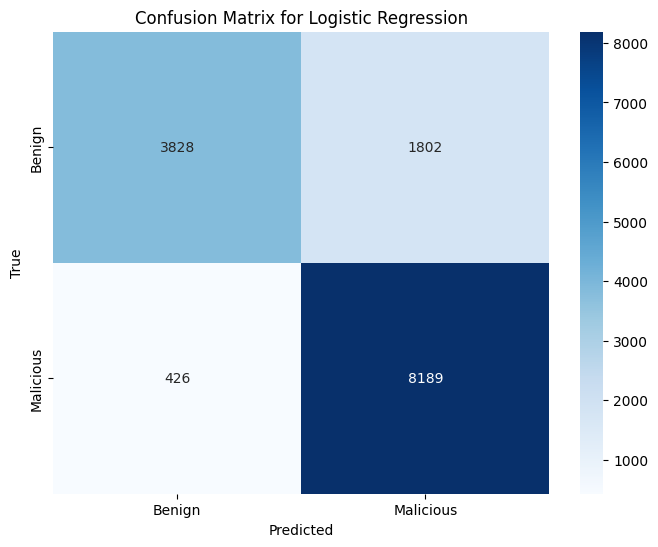

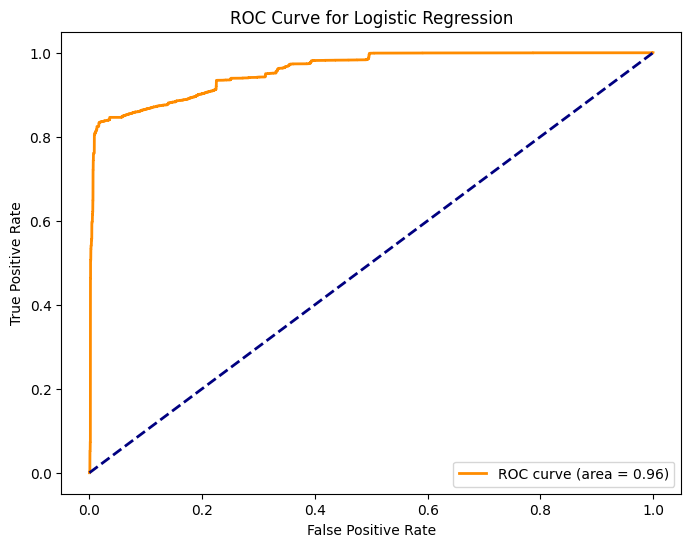

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5630
           1       1.00      0.93      0.96      8615

    accuracy                           0.96     14245
   macro avg       0.95      0.96      0.95     14245
weighted avg       0.96      0.96      0.96     14245



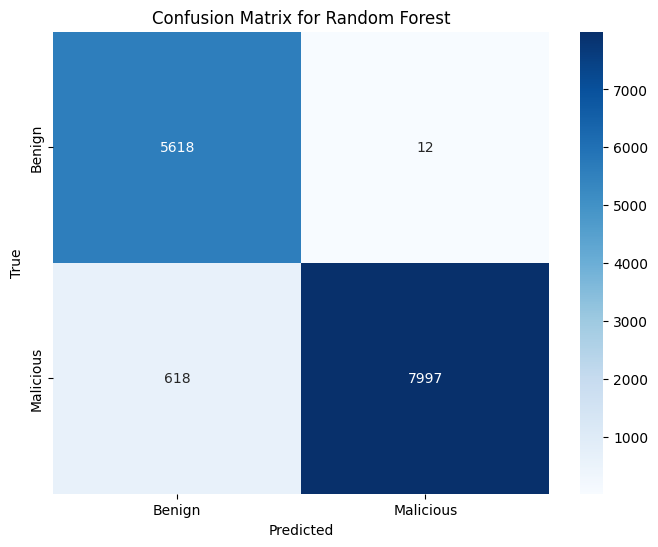

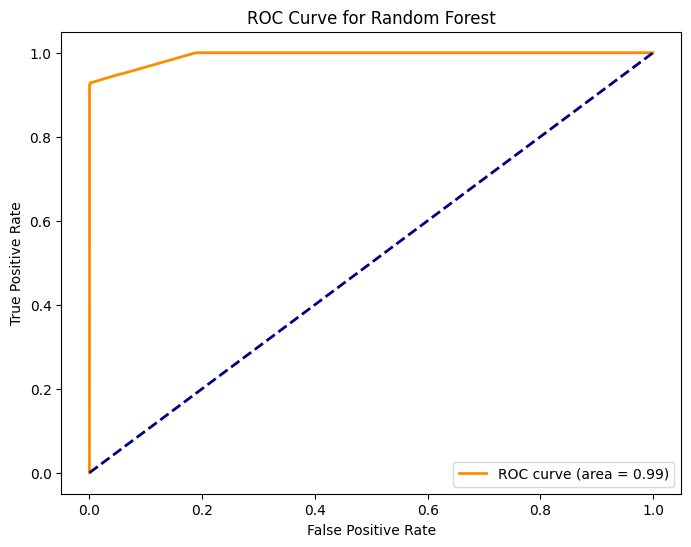

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5630
           1       0.98      0.96      0.97      8615

    accuracy                           0.96     14245
   macro avg       0.96      0.96      0.96     14245
weighted avg       0.96      0.96      0.96     14245



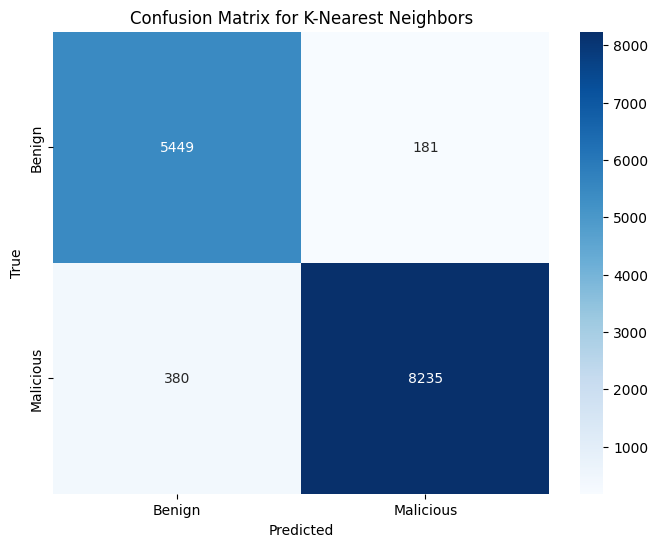

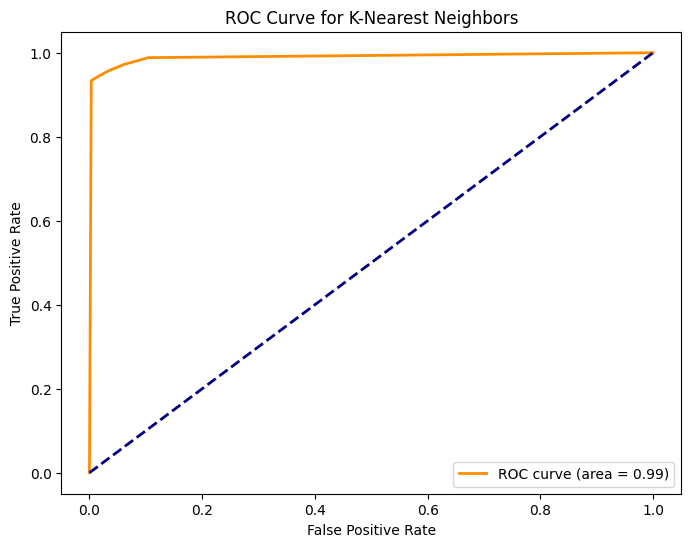

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5630
           1       1.00      0.93      0.96      8615

    accuracy                           0.95     14245
   macro avg       0.95      0.96      0.95     14245
weighted avg       0.96      0.95      0.95     14245



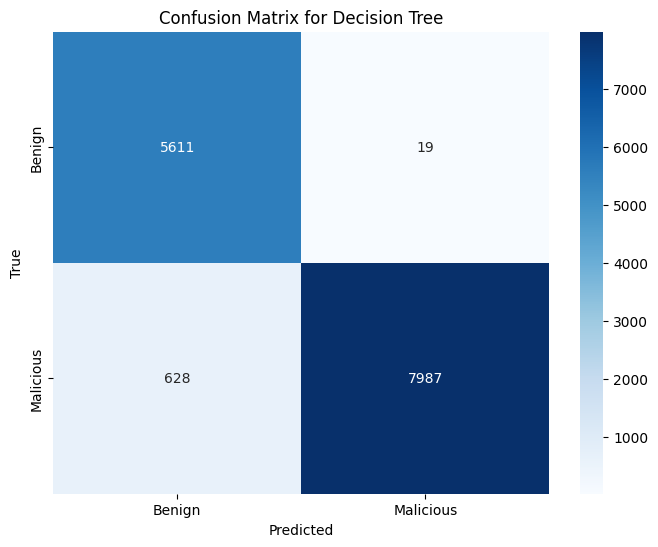

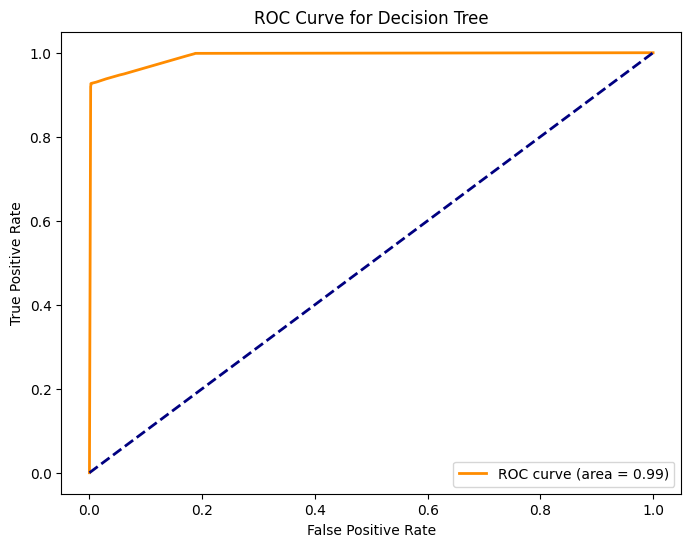


Overall Model Performance:
Logistic Regression:
  accuracy: 0.8436
  precision: 0.8196
  recall: 0.9506
  f1_score: 0.8803
  roc_auc: 0.8152
  training_time: 0.2652
Random Forest:
  accuracy: 0.9558
  precision: 0.9985
  recall: 0.9283
  f1_score: 0.9621
  roc_auc: 0.9631
  training_time: 4.5820
K-Nearest Neighbors:
  accuracy: 0.9606
  precision: 0.9785
  recall: 0.9559
  f1_score: 0.9671
  roc_auc: 0.9619
  training_time: 2.4692
Decision Tree:
  accuracy: 0.9546
  precision: 0.9976
  recall: 0.9271
  f1_score: 0.9611
  roc_auc: 0.9619
  training_time: 0.3897


In [15]:

import time
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Train and evaluate each model
results = {}
for name, model in models.items():
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()  # Record end time
    training_time = end_time - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'training_time': training_time
    }
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    # Plot ROC curve
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
# Print overall results
print("\nOverall Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [17]:

# Convert labels to categorical format for multi-class classification
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predictions and evaluation metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8474 - loss: 0.3272 - val_accuracy: 0.9007 - val_loss: 0.1646
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9102 - loss: 0.1714 - val_accuracy: 0.9236 - val_loss: 0.1524
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9199 - loss: 0.1527 - val_accuracy: 0.9277 - val_loss: 0.1422
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9257 - loss: 0.1431 - val_accuracy: 0.9257 - val_loss: 0.1385
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 0.1371 - val_accuracy: 0.9250 - val_loss: 0.1371
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.1357 - val_accuracy: 0.9299 - val_loss: 0.1334
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9289 - loss: 0.1363 - val_accuracy: 0.9273 - val_loss: 0.1328
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9276 - loss: 0.1319 - val_accuracy: 0.

# **Define Deep Learning Models**

## **Intilize the Deep Learning Model**

In [ ]:


# Model 1: Fully Connected Neural Network
def create_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, input_shape=(input_shape,), activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 2: CNN Neural Network
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        # MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(32, kernel_size=3, activation='relu'),
        # MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 3: LSTM Neural Network
def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=(1, input_shape), activation='relu', return_sequences=False),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dense(16, activation='relu'),

        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 4: GRU Neural Network
def create_gru_model(input_shape, num_classes):
    model = Sequential([
        GRU(64, input_shape=(1, input_shape), activation='relu', return_sequences=True),
        Dropout(0.3),
        GRU(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


## **Preparing the Data Set**

---
Preparing the data set for the deep learning Model


In [ ]:

# Prepare input shape for CNN, LSTM, and GRU
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)
X_train_seq = np.expand_dims(X_train, axis=1)
X_test_seq = np.expand_dims(X_test, axis=1)

# Train and evaluate each model
models = {
    "DenseNet": create_dense_model(X_train.shape[1], num_classes),
    "CNN": create_cnn_model(X_train.shape[1], num_classes),
    "LSTM": create_lstm_model(X_train.shape[1], num_classes),
    "GRU": create_gru_model(X_train.shape[1], num_classes)
}

history_dict = {}
time_dict = {}


## **Evalute the Deep Learning Model**


Training DenseNet...
Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8434 - loss: 0.3466 - val_accuracy: 0.8981 - val_loss: 0.1729
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9070 - loss: 0.1825 - val_accuracy: 0.9266 - val_loss: 0.1503
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9203 - loss: 0.1527 - val_accuracy: 0.9272 - val_loss: 0.1453
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9214 - loss: 0.1473 - val_accuracy: 0.9281 - val_loss: 0.1394
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9234 - loss: 0.1446 - val_accuracy: 0.9276 - val_loss: 0.1416
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9278 - loss: 0.1394 - val_accuracy: 0.9262 - val_loss: 0.1373
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9257 - loss: 0.1374 - val_accuracy: 0.9262 - val_loss: 0.1336
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9277 - loss: 0.1

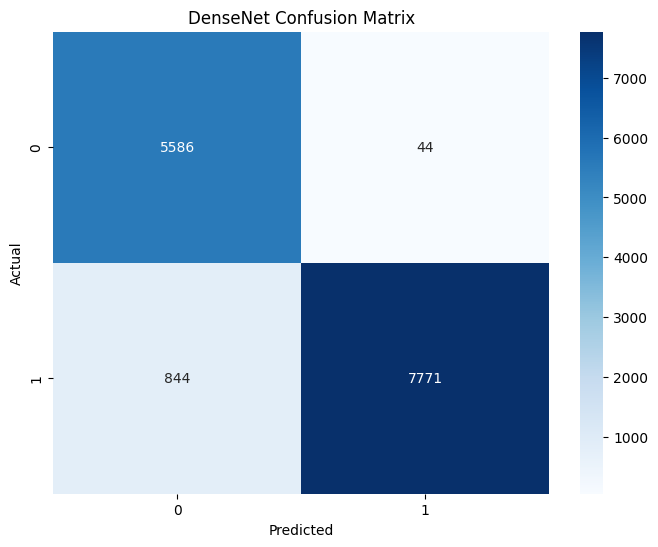


Training CNN...
Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8568 - loss: 0.3144 - val_accuracy: 0.9018 - val_loss: 0.1707
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9139 - loss: 0.1688 - val_accuracy: 0.9300 - val_loss: 0.1471
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9199 - loss: 0.1493 - val_accuracy: 0.9244 - val_loss: 0.1530
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9217 - loss: 0.1444 - val_accuracy: 0.9228 - val_loss: 0.1460
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9239 - loss: 0.1378 - val_accuracy: 0.9300 - val_loss: 0.1316
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9258 - loss: 0.1321 - val_accuracy: 0.9320 - val_loss: 0.1354
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9293 - loss: 0.1310 - val_accuracy: 0.9345 - val_loss: 0.1273
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9305 - loss: 0.1273 -

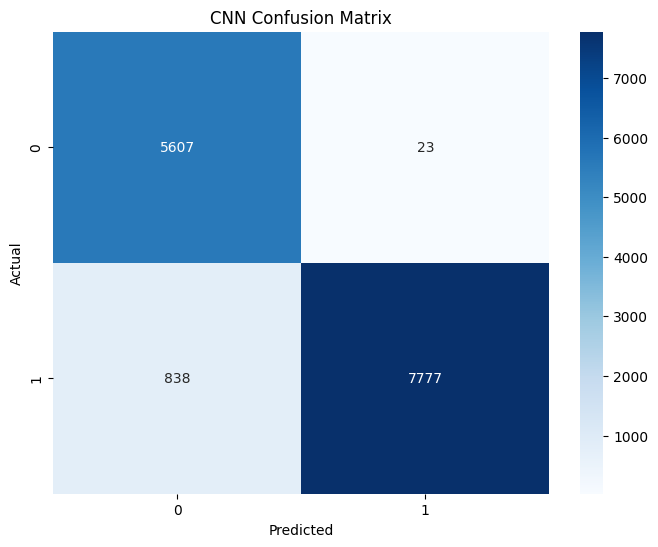


Training LSTM...
Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8309 - loss: 0.3641 - val_accuracy: 0.9229 - val_loss: 0.1548
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9154 - loss: 0.1585 - val_accuracy: 0.9244 - val_loss: 0.1462
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9233 - loss: 0.1452 - val_accuracy: 0.9033 - val_loss: 0.1411
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9230 - loss: 0.1406 - val_accuracy: 0.9259 - val_loss: 0.1407
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9288 - loss: 0.1353 - val_accuracy: 0.9270 - val_loss: 0.1337
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9282 - loss: 0.1297 - val_accuracy: 0.9345 - val_loss: 0.1321
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9278 - loss: 0.1303 - val_accuracy: 0.9345 - val_loss: 0.1302
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9306 - loss: 0.1243

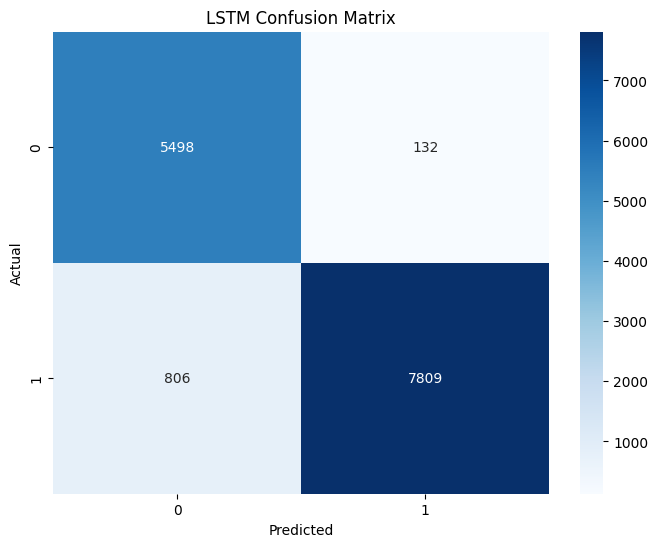


Training GRU...
Epoch 1/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8308 - loss: 0.3893 - val_accuracy: 0.9022 - val_loss: 0.1681
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9119 - loss: 0.1705 - val_accuracy: 0.9051 - val_loss: 0.1615
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9155 - loss: 0.1542 - val_accuracy: 0.9029 - val_loss: 0.1539
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9198 - loss: 0.1466 - val_accuracy: 0.9247 - val_loss: 0.1437
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9201 - loss: 0.1389 - val_accuracy: 0.9280 - val_loss: 0.1398
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9253 - loss: 0.1361 - val_accuracy: 0.9251 - val_loss: 0.1367
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9237 - loss: 0.1347 - val_accuracy: 0.9294 - val_loss: 0.1354
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9262 - loss: 0.1327 -

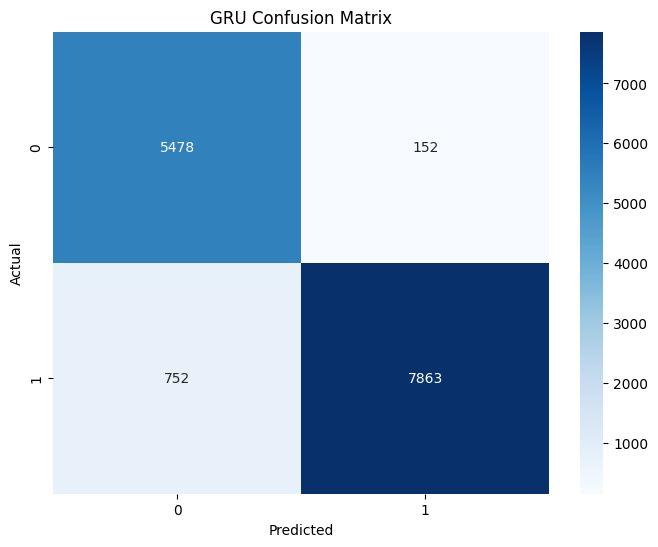

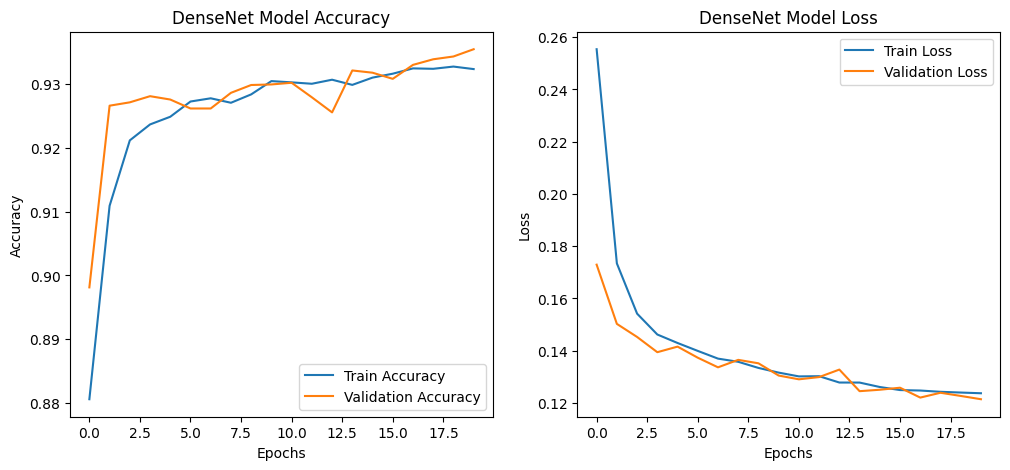

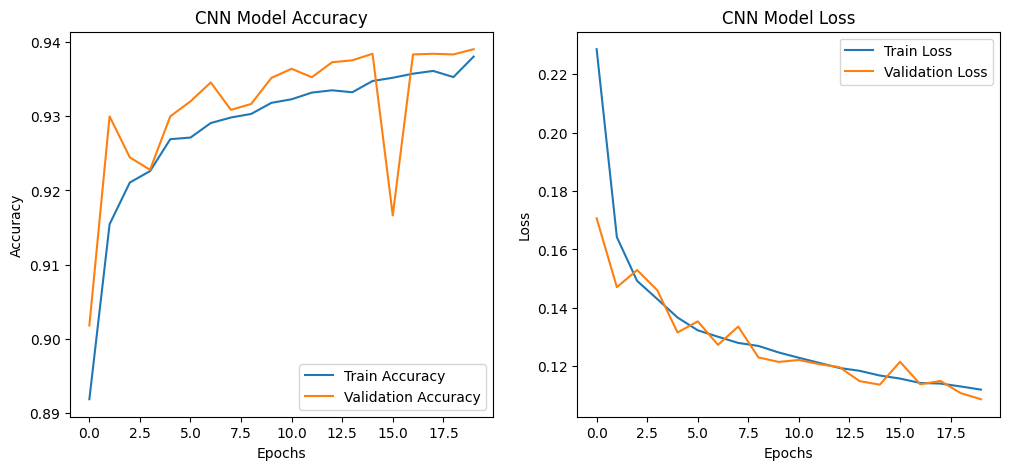

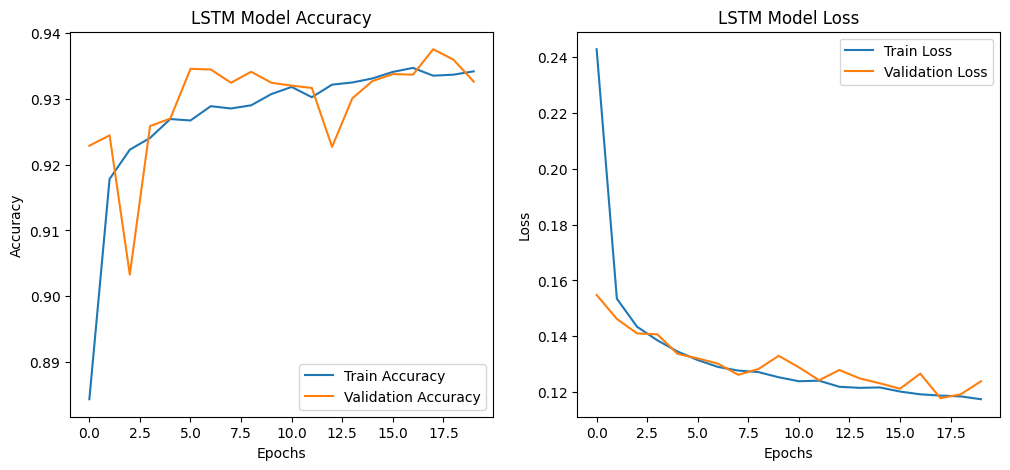

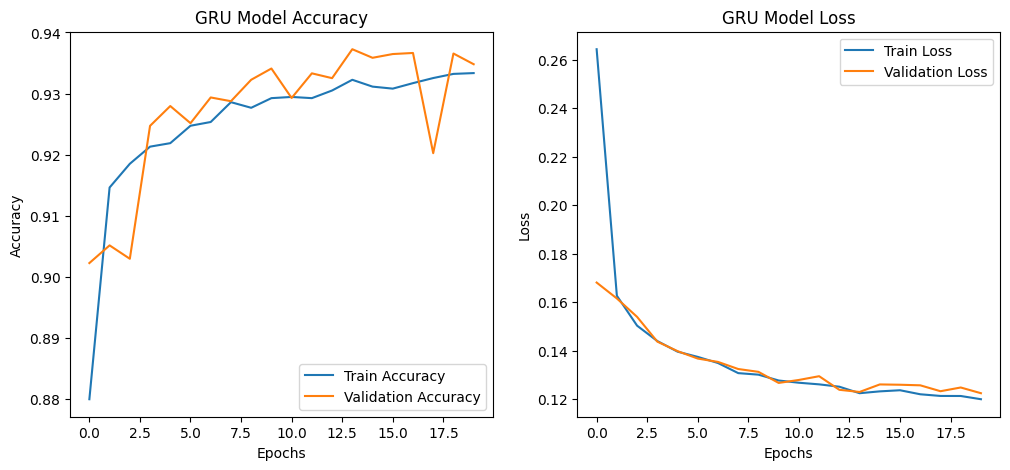


Training Time for Each Model:
DenseNet: 51.26 seconds
CNN: 53.50 seconds
LSTM: 47.00 seconds
GRU: 53.12 seconds


In [25]:

for model_name, model in models.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining {model_name}...")

    start_time = time.time()  # Start timing

    if model_name == "DenseNet":
        history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
    elif model_name == "CNN":
        history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
    elif model_name in ["LSTM", "GRU"]:
        history = model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

    end_time = time.time()  # End timing

    # Store history and time complexity for plotting
    history_dict[model_name] = history.history
    time_dict[model_name] = end_time - start_time

    # Evaluate the model
    if model_name == "DenseNet":
        y_pred = model.predict(X_test)
    elif model_name == "CNN":
        y_pred = model.predict(X_test_cnn)
    else:
        y_pred = model.predict(X_test_seq)

    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)


    precision = precision_score(y_test_classes, y_pred_classes)
    recall = recall_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes)
    roc_auc = roc_auc_score(y_test_classes, y_pred_classes)

    print(f"{model_name} Metrics:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Plot Confusion Matrix
    print(f"\n{model_name} Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot Training History
for model_name, history in history_dict.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Print time complexity for each model
print("\nTraining Time for Each Model:")
for model_name, time_taken in time_dict.items():
    print(f"{model_name}: {time_taken:.2f} seconds")
